# Projek Analisis Data dengan Pyhton

**Nama    = Malique Abdul Aziz**

**Email   = maliqueaji@gmail.com**

**Username = malique_abdul_aziz**

Pertanyaan :
1. Faktor apa saja yang memengaruhi kualitas udara?

2. Kapan dan dimana peristiwa daerah memiliki kualitas udara terbaik dan terburuk dari rentang waktu tahun 2013 sampai 2017?



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Gathering Data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/maliqueaa/aqi/main/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
df1 = pd.read_csv("https://raw.githubusercontent.com/maliqueaa/aqi/main/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/maliqueaa/aqi/main/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv")
df3 = pd.read_csv("https://raw.githubusercontent.com/maliqueaa/aqi/main/PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv")
df4 = pd.read_csv("https://raw.githubusercontent.com/maliqueaa/aqi/main/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv")
df5 = pd.read_csv("https://raw.githubusercontent.com/maliqueaa/aqi/main/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv")
df6 = pd.read_csv("https://raw.githubusercontent.com/maliqueaa/aqi/main/PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv")
df7 = pd.read_csv("https://raw.githubusercontent.com/maliqueaa/aqi/main/PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
df8 = pd.read_csv("https://raw.githubusercontent.com/maliqueaa/aqi/main/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv")
df9 = pd.read_csv("https://raw.githubusercontent.com/maliqueaa/aqi/main/PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv")
df10 = pd.read_csv("https://raw.githubusercontent.com/maliqueaa/aqi/main/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv")
df11 = pd.read_csv("https://raw.githubusercontent.com/maliqueaa/aqi/main/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv")
df.head() #menampilkan untuk contoh

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [3]:
dataframe = pd.concat([df,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11])
dataframe.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


Karena dataframe adalah gabungan dataset, jadi saya ubah nomornya agar tidak duplikat

In [4]:
dataframe = dataframe.reset_index()
dataframe = dataframe.drop('No', axis=1)
dataframe.head()

,index,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [5]:
dataframe['Date'] = pd.to_datetime(dataframe[['year', 'month', 'day', 'hour']])
dataframe.drop(['month', 'day', 'hour'], axis=1, inplace=True)
dataframe.head()

,index,year,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Date
0,0,2013,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,1,2013,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,2,2013,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,3,2013,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,4,2013,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


# Assessing Data

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   index    420768 non-null  int64         
 1   year     420768 non-null  int64         
 2   PM2.5    412029 non-null  float64       
 3   PM10     414319 non-null  float64       
 4   SO2      411747 non-null  float64       
 5   NO2      408652 non-null  float64       
 6   CO       400067 non-null  float64       
 7   O3       407491 non-null  float64       
 8   TEMP     420370 non-null  float64       
 9   PRES     420375 non-null  float64       
 10  DEWP     420365 non-null  float64       
 11  RAIN     420378 non-null  float64       
 12  wd       418946 non-null  object        
 13  WSPM     420450 non-null  float64       
 14  station  420768 non-null  object        
 15  Date     420768 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(11), int64(2), object(2)
m

In [7]:
dataframe.isna().sum()

index          0
year           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
Date           0
dtype: int64

In [8]:
print("Jumlah duplikasi: ", dataframe.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
dataframe.describe()

,index,year,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,Date
count,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000,420768
mean,17531.500000,2014.662560,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711,2015-03-01 11:30:00.000001024
min,0.000000,2013.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000,2013-03-01 00:00:00
25%,8765.750000,2014.000000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000,2014-03-01 05:45:00
50%,17531.500000,2015.000000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000,2015-03-01 11:30:00
75%,26297.250000,2016.000000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000,2016-02-29 17:15:00
max,35063.000000,2017.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000,2017-02-28 23:00:00
std,10122.116943,1.177198,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386,NaN


# Cleaning Data

Pada bagian sebelumnya, terdapat banyak sekali data yang hilang. Jika data dihapus makan akan kehilangan banyak sekali informasi. Jadi penyelesaiannya adalah ada beberapa yang dihapus dan ada beberapa yang diganti nilainya dengan nilai mean/median.

In [10]:
dataframe.dropna(subset=["WSPM", "wd", "RAIN", "DEWP", "PRES", "TEMP"], axis=0, inplace=True)

data_mean = ["PM2.5", "PM10", "SO2", "NO2", "O3"]
dataframe[data_mean] = dataframe[data_mean].fillna(dataframe[data_mean].mean())

data_median = dataframe["CO"].median()
dataframe["CO"].fillna(data_median, axis=0, inplace=True)

In [11]:
dataframe.isna().sum()

index      0
year       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
Date       0
dtype: int64

Dengan begini dari output diatas sudah bersih dan bisa masuk tahapan selanjutnya

# Exploratory Data Analysis

In [12]:
dataframe.describe(include='all')

,index,year,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Date
count,418858.000000,418858.000000,418858.000000,418858.000000,418858.00000,418858.000000,418858.000000,418858.000000,418858.000000,418858.000000,418858.000000,418858.000000,418858,418858.000000,418858,418858
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Dongsi,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43322,NaN,34980,NaN
mean,17484.092955,2014.657039,79.707228,104.540046,15.84451,50.594782,1212.680302,57.507136,13.562796,1010.732098,2.493081,0.064609,NaN,1.734993,NaN,2015-02-27 12:05:34.638468864
min,0.000000,2013.000000,2.000000,2.000000,0.28560,1.026500,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,NaN,0.000000,NaN,2013-03-01 00:00:00
25%,8729.000000,2014.000000,21.000000,36.000000,3.00000,24.000000,500.000000,12.000000,3.200000,1002.200000,-8.900000,0.000000,NaN,0.900000,NaN,2014-02-27 17:00:00
50%,17473.000000,2015.000000,57.000000,84.000000,8.00000,45.000000,900.000000,47.000000,14.500000,1010.400000,3.100000,0.000000,NaN,1.400000,NaN,2015-02-27 01:00:00
75%,26235.000000,2016.000000,109.000000,144.000000,19.00000,70.000000,1500.000000,80.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN,2016-02-27 03:00:00
max,35063.000000,2017.000000,999.000000,999.000000,500.00000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,NaN,13.200000,NaN,2017-02-28 23:00:00


Pertama, saya definisikan terlebih dahulu apa saja faktor-faktor yang bisa mempengaruhi kualitas udara. Sebagai berikut :

**PM2.5 (Particulate Matter 2.5)**

- Partikel kecil (<2.5 mikrometer) dari pembakaran bahan bakar fosil dan aktivitas manusia.
- Potensial merusak kesehatan karena dapat masuk ke dalam aliran darah melalui saluran pernapasan.

**PM10 (Particulate Matter 10)**

- Partikel dengan diameter ≤10 mikrometer, serupa dengan PM2.5 tetapi ukurannya lebih besar.
- Dapat menyebabkan gangguan pernapasan dan masalah kesehatan.

**SO2 (Sulfur Dioxide)**

- Gas dari pembakaran bahan bakar fosil dengan kandungan belerang.
Menyebabkan iritasi mata dan saluran pernapasan, serta berkontribusi pada pembentukan hujan asam.

**NO2 (Nitrogen Dioxide)**

- Gas dari pembakaran kendaraan dan pembangkit listrik.
Menyebabkan iritasi saluran pernapasan dan berkontribusi pada pembentukan ozon di permukaan bumi.

**CO (Carbon Monoxide)**

- Gas tak berwarna dan tidak berbau dari pembakaran bahan bakar fosil.
Menghambat transportasi oksigen dalam darah, dapat menyebabkan asfiksia.

**O3 (Ozone)**

- Gas terbentuk dari reaksi oksida nitrogen dan senyawa organik volatil di bawah sinar matahari.
- Ozon di permukaan bumi dapat menyebabkan iritasi saluran pernapasan, terutama pada populasi yang rentan.

Dengan begini, kita bisa membuat klasifikasi kualitas udara.

In [13]:
def AQI(PM25, PM10, SO2, NO2, CO, O3):
    standar = {
        'PM25': [(0, 12), (12, 35), (35, float('inf'))],
        'PM10': [(0, 50), (50, 100), (100, float('inf'))],
        'SO2': [(0, 20), (20, 100), (100, float('inf'))],
        'NO2': [(0, 40), (40, 100), (100, float('inf'))],
        'CO': [(0, 1000), (1000, 5000), (5000, float('inf'))],
        'O3': [(0, 100), (100, 180), (180, float('inf'))]
    }

    def kualitas(nilai, parameter):
        for kualitas, batas in enumerate(standar[parameter], start=1):
            if isinstance(batas, tuple):
                if batas[0] <= nilai < batas[1]:
                    return kualitas
            else:
                if nilai == batas:
                    return kualitas
        return 3  

    kualitas_PM25 = kualitas(float(PM25), 'PM25')
    kualitas_PM10 = kualitas(float(PM10), 'PM10')
    kualitas_SO2 = kualitas(float(SO2), 'SO2')
    kualitas_NO2 = kualitas(float(NO2), 'NO2')
    kualitas_CO = kualitas(float(CO), 'CO')
    kualitas_O3 = kualitas(float(O3), 'O3')

    rata_rata = (kualitas_PM25 + kualitas_PM10 + kualitas_SO2 + kualitas_NO2 + kualitas_CO + kualitas_O3) / 6

    if rata_rata < 2:  
        return 'Baik'
    elif rata_rata < 2.5:  
        return 'Sedang'
    else:
        return 'Buruk'

dataframe['kualitas_udara'] = dataframe.apply(
    lambda row: AQI(
        row['PM2.5'],
        row['PM10'],
        row['SO2'],
        row['NO2'],
        row['CO'],
        row['O3']
    ),
    axis=1
)

dataframe['kualitas_udara'] = dataframe['kualitas_udara'].astype('category')

In [14]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418858 entries, 0 to 420767
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   index           418858 non-null  int64         
 1   year            418858 non-null  int64         
 2   PM2.5           418858 non-null  float64       
 3   PM10            418858 non-null  float64       
 4   SO2             418858 non-null  float64       
 5   NO2             418858 non-null  float64       
 6   CO              418858 non-null  float64       
 7   O3              418858 non-null  float64       
 8   TEMP            418858 non-null  float64       
 9   PRES            418858 non-null  float64       
 10  DEWP            418858 non-null  float64       
 11  RAIN            418858 non-null  float64       
 12  wd              418858 non-null  object        
 13  WSPM            418858 non-null  float64       
 14  station         418858 non-null  object  

In [15]:
dataframe.head()

,index,year,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Date,kualitas_udara
0,0,2013,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00,Baik
1,1,2013,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00,Baik
2,2,2013,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00,Baik
3,3,2013,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00,Baik
4,4,2013,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00,Baik


In [16]:
dataframe.kualitas_udara.value_counts()

kualitas_udara
Baik      263145
Sedang    147974
Buruk       7739
Name: count, dtype: int64

In [17]:
dataframe.groupby(by= "station").agg({
    "kualitas_udara": "value_counts"
})

kualitas_udara
station       kualitas_udara                
Aotizhongxin  Baik                     20932
              Sedang                   13255
              Buruk                      790
Changping     Baik                     23770
              Sedang                   10700
              Buruk                      443
Dingling      Baik                     27065
              Sedang                    7668
              Buruk                      180
Dongsi        Baik                     20630
              Sedang                   13664
              Buruk                      686
Guanyuan      Baik                     20525
              Sedang                   13600
              Buruk                      852
Gucheng       Baik                     19806
              Sedang                   14355
              Buruk                      737
Huairou       Baik                     25213
              Sedang                    9322
              Buruk                      219
Nongzhanguan  Baik                     20140
              Sedang                   13768
              Buruk                     1072
Shunyi        Baik                     23103
              Sedang                   11044
              Buruk                      425
Tiantan       Baik                     21558
              Sedang                   12926
              Buruk                      496
Wanliu        Baik                     20198
              Sedang                   13735
              Buruk                     1002
Wanshouxigong Baik                     20205
              Sedang                   13937
              Buruk                      837

Informasi yang bisa kita ambil dari data diatas sebagai berikut :

- kategori "Baik" terbanyak: Dingling dengan total 27.065.

- Kategori "Sedang" terbanyak: Gucheng dengan total 14.355.

- Kategori "Buruk" terbanyak: Nongzhanguan dengan total 1.072.

Selanjutnya saya akan mencari kualitas udara berdasarkan waktunya.

In [18]:
dataframe.groupby(by= "year").agg({
    "kualitas_udara": "value_counts"
})

kualitas_udara
year kualitas_udara                
2013 Baik                     53804
     Sedang                   32418
     Buruk                     1872
2014 Baik                     60156
     Sedang                   41965
     Buruk                     2984
2015 Baik                     67318
     Sedang                   35327
     Buruk                     1878
2016 Baik                     72066
     Sedang                   31875
     Buruk                      690
2017 Baik                      9801
     Sedang                    6389
     Buruk                      315

In [19]:
result = dataframe.groupby(by=["station", dataframe['Date'].dt.year])['kualitas_udara'].value_counts().unstack()
print(result)

kualitas_udara      Baik  Buruk  Sedang
station       Date                     
Aotizhongxin  2013  3993    196    3154
              2014  5058    257    3443
              2015  5091    227    3436
              2016  5994     74    2673
              2017   796     36     549
Changping     2013  5001     94    2244
              2014  5418    183    3159
              2015  6150    106    2437
              2016  6325     33    2381
              2017   876     27     479
Dingling      2013  5846     41    1452
              2014  6479     50    2231
              2015  6697     34    1962
              2016  7070     42    1627
              2017   973     13     396
Dongsi        2013  4311    176    2857
              2014  4596    194    3970
              2015  5247    196    3311
              2016  5699     82    2960
              2017   777     38     566
Guanyuan      2013  4296    183    2864
              2014  4635    363    3760
              2015  5272    218    3264


# Visualisasi Data

1. Perbandingan Kualitas Udara Berdasarkan Tempat

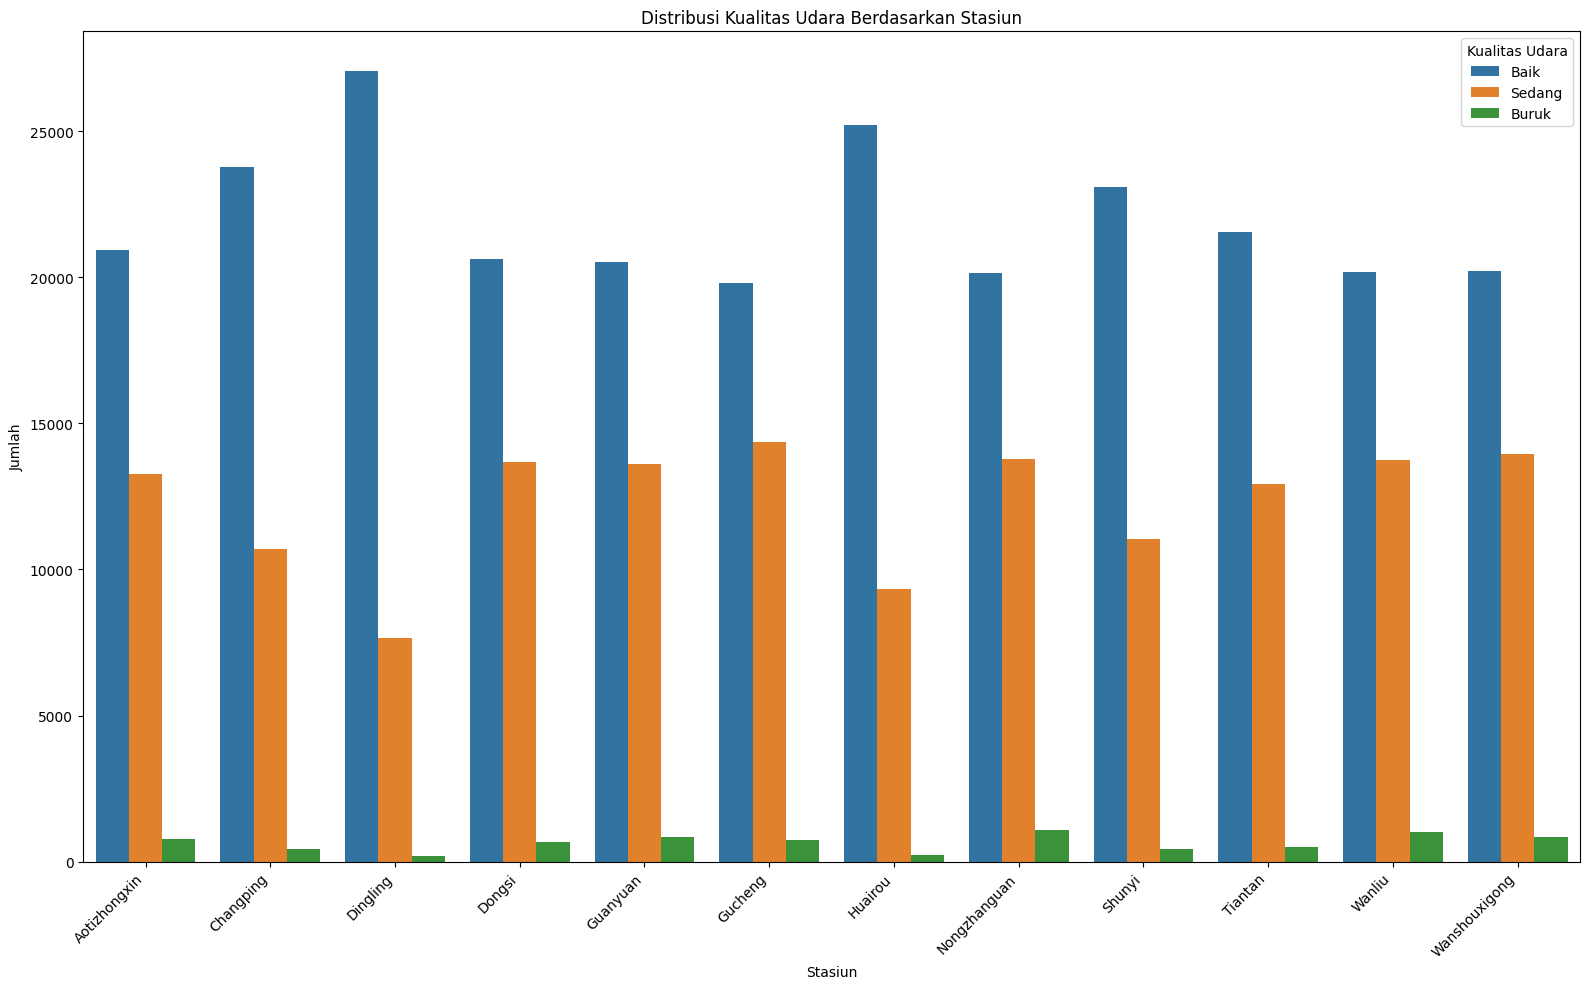

In [20]:
data_stasiun = {
    'station': ['Aotizhongxin', 'Aotizhongxin', 'Aotizhongxin', 'Changping', 'Changping', 'Changping', 
                'Dingling', 'Dingling', 'Dingling', 'Dongsi', 'Dongsi', 'Dongsi', 
                'Guanyuan', 'Guanyuan', 'Guanyuan', 'Gucheng', 'Gucheng', 'Gucheng', 
                'Huairou', 'Huairou', 'Huairou', 'Nongzhanguan', 'Nongzhanguan', 'Nongzhanguan', 
                'Shunyi', 'Shunyi', 'Shunyi', 'Tiantan', 'Tiantan', 'Tiantan', 
                'Wanliu', 'Wanliu', 'Wanliu', 'Wanshouxigong', 'Wanshouxigong', 'Wanshouxigong'],
    'kualitas_udara': ['Baik', 'Sedang', 'Buruk'] * 12,
    'count': [20932, 13255, 790, 23770, 10700, 443, 27065, 7668, 180, 20630, 13664, 686, 
              20525, 13600, 852, 19806, 14355, 737, 25213, 9322, 219, 20140, 13768, 1072, 
              23103, 11044, 425, 21558, 12926, 496, 20198, 13735, 1002, 20205, 13937, 837]
}

df_visual_stasiun = pd.DataFrame(data_stasiun)

plt.figure(figsize=(16, 10))
sns.barplot(x='station', y='count', hue='kualitas_udara', data=df_visual_stasiun)

plt.title('Distribusi Kualitas Udara Berdasarkan Stasiun')
plt.xlabel('Stasiun')
plt.ylabel('Jumlah')
plt.legend(title='Kualitas Udara')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Informasi yang bisa kita ambil dari chart diatas sebagai berikut :

- kategori "Baik" terbanyak: Dingling dengan total 27.065.

- Kategori "Sedang" terbanyak: Gucheng dengan total 14.355.

- Kategori "Buruk" terbanyak: Nongzhanguan dengan total 1.072.

2. Perbandingan Kualitas Udara Berdasarkan Waktu

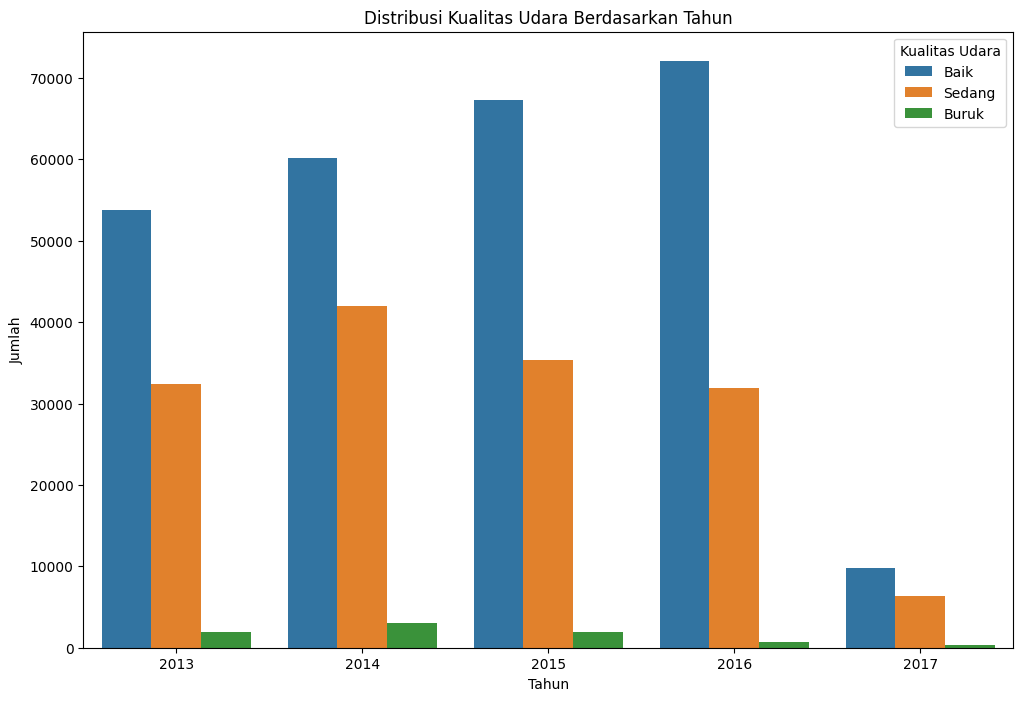

In [21]:
data = {
    'year': [2013, 2013, 2013, 2014, 2014, 2014, 2015, 2015, 2015, 2016, 2016, 2016, 2017, 2017, 2017],
    'kualitas_udara': ['Baik', 'Sedang', 'Buruk'] * 5,
    'count': [53804, 32418, 1872, 60156, 41965, 2984, 67318, 35327, 1878, 72066, 31875, 690, 9801, 6389, 315]
}

df_visual = pd.DataFrame(data)

plt.figure(figsize=(12, 8))
sns.barplot(x='year', y='count', hue='kualitas_udara', data=df_visual)

plt.title('Distribusi Kualitas Udara Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.legend(title='Kualitas Udara')

plt.show()

Informasi yang bisa kita ambil dari chart diatas sebagai berikut :

- kategori "Baik" terbanyak: Tahun 2016 dengan total 72.066.

- Kategori "Sedang" terbanyak: Tahun 2014 dengan total 41.965.

- Kategori "Buruk" terbanyak: Tahun 2014 dengan total 2.984.

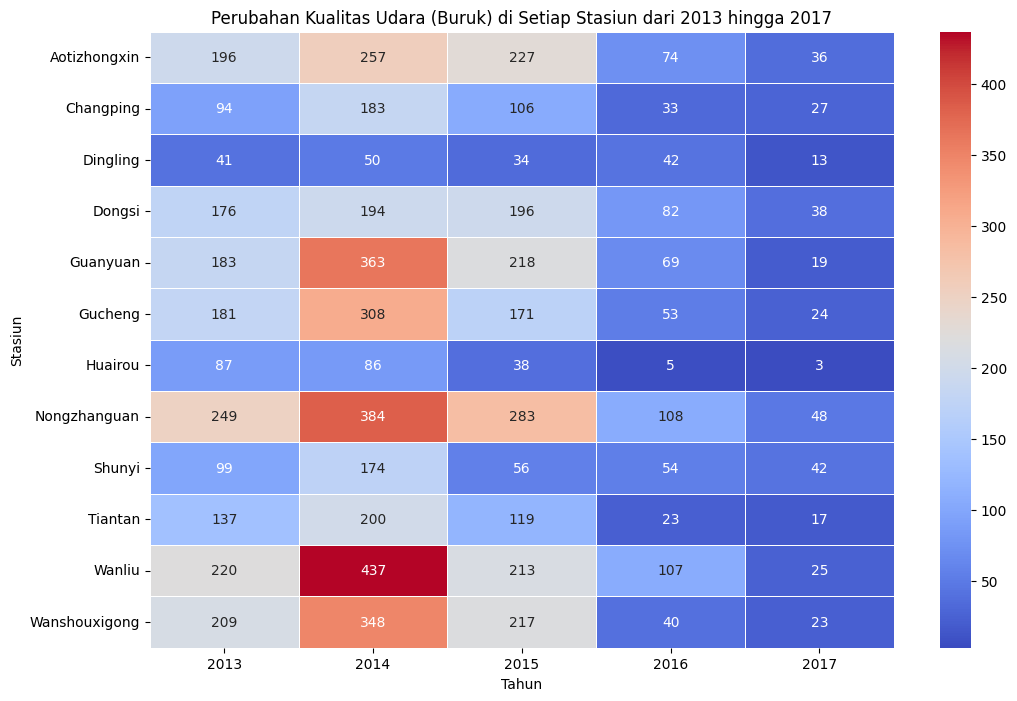

In [22]:
data = {
    'station': ['Aotizhongxin']*5 + ['Changping']*5 + ['Dingling']*5 + ['Dongsi']*5 + ['Guanyuan']*5 + ['Gucheng']*5 +
                ['Huairou']*5 + ['Nongzhanguan']*5 + ['Shunyi']*5 + ['Tiantan']*5 + ['Wanliu']*5 + ['Wanshouxigong']*5,
    'Date': [2013, 2014, 2015, 2016, 2017]*12,
    'Baik': [3993, 5058, 5091, 5994, 796,
             5001, 5418, 6150, 6325, 876,
             5846, 6479, 6697, 7070, 973,
             4311, 4596, 5247, 5699, 777,
             4296, 4635, 5272, 5525, 797,
             3992, 4365, 5227, 5460, 762,
             5200, 5797, 6460, 6822, 934,
             4058, 4434, 5198, 5673, 777,
             4908, 5341, 5820, 6264, 770,
             4193, 5019, 5606, 5944, 796,
             4003, 4446, 5215, 5758, 776,
             4003, 4568, 5335, 5532, 767],
    'Buruk': [196, 257, 227, 74, 36,
              94, 183, 106, 33, 27,
              41, 50, 34, 42, 13,
              176, 194, 196, 82, 38,
              183, 363, 218, 69, 19,
              181, 308, 171, 53, 24,
              87, 86, 38, 5, 3,
              249, 384, 283, 108, 48,
              99, 174, 56, 54, 42,
              137, 200, 119, 23, 17,
              220, 437, 213, 107, 25,
              209, 348, 217, 40, 23]
}

df = pd.DataFrame(data)

heatmap_data = df.pivot_table(index='station', columns='Date', values='Buruk')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='g', linewidths=.5)

plt.title('Perubahan Kualitas Udara (Buruk) di Setiap Stasiun dari 2013 hingga 2017')
plt.xlabel('Tahun')
plt.ylabel('Stasiun')

plt.show()

Informasi yang bisa diambil dari chart ini adalah pada tahun 2014 dan tahun 2015 kualitas udara yang dimiliki cenderung sedang ke buruk, sedangkan pada tahun 2016 dan 2017 kualitas udara yang dimiliki terlihat lebih baik dari tahun sebelumnya. Dan untuk berdasarkan tempat bisa dilihat daerah Dingling, Huairou, dan Changping memiliki kualitas udara yang baik dari tahun ke tahun, sedangkan untuk daerah Nongzhanguan, Wanliu, Wanshouxigong, Ganyuan, dan Gucheng memiliki kualitas udara yang cenderung sedang ke buruk dari tahun 2013 ke tahun 2015 dan mulai membaik pada tahun 2016 dan 2017.

In [23]:
dataframe.to_csv("dataframe.csv", index=False)